# Part III: Generative Adversarial Networks
- GAN
    - Introduction: What is GAN?
    - Loss Function and Training
    - Theoretical Analysis of GAN. 
- WGAN

## Generative Adversarial Networks (GAN)

### Introduction: What is GAN?
A generative adversarial network can be viewed as a two-player game involving a **generator** and a **discriminator**. The generator plays the role of a counterfeiter attempting to create fake currency, while the discriminator acts as the police, aiming to distinguish legitimate money from counterfeit money.

**Notation and Termonology.** In the following discussion, we denote $G$ for the generator network with its parameter $\theta^G$, $D$ for the discriminator network with its parameter $\theta^D$, $\mathcal{X}$ the image space, for example $\mathbb{R}^{256\times 256}$, $p_{data}$ the data distribution in $\mathcal{X}$, $p_g$ the data distribution in $\mathcal{X}$ generated by $G$, $\mathcal{Z}$ for the latent space, and $p_z$ the priori distribution in $\mathcal{Z}$. Also, we refer to a neural network fixed as its parameters are fixed.

The generator $G$, a map from $\mathcal{Z}\to\mathcal{X}$, is a differentiable neural network that generates fake images. Usually, the dimension of $\mathcal{Z}$ is much smaller than $\mathcal{X}$, which means $G$ is map from a low dimensional space to a high dimensional space. The discriminator, a differentiable neural network that maps $\mathcal{X}\to [0,1]$, on the otherhand, outputs a scalar in $[0,1]$ that the probability of the input image of $D$ is **real**. If $D(\hat{\mathbf{x}})$ is greater than or equal to $0.5$, then the discriminator identifies $\hat{\mathbf{x}}$ as a real image, or otherwise, $\hat{\mathbf{x}}$ is fake.

Their interaction can be illustrated as below:
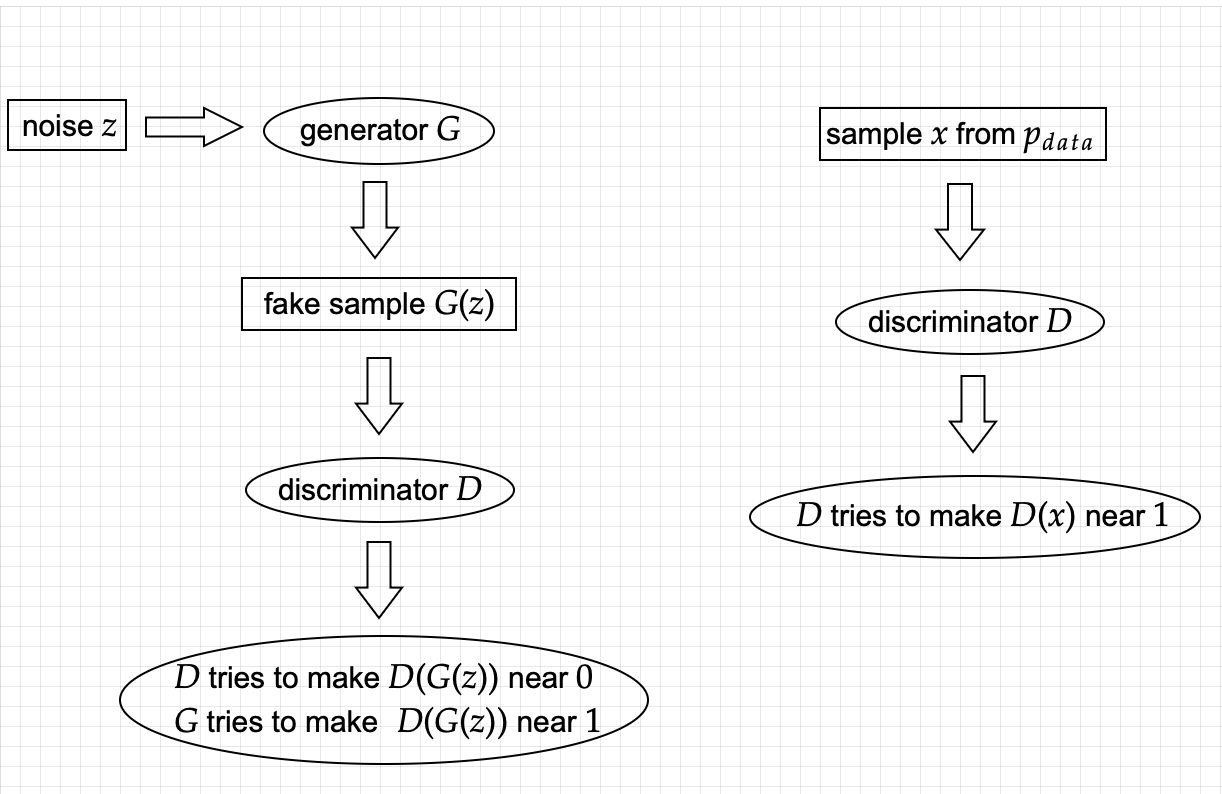



### Loss Function and Training
Both players have loss functions that are defined on $\theta^G$ and $\theta^D$. The discriminator wishes to minimize $L_D=L_D(\theta^G,\theta^D)$ and must do while controlling only $\theta^D$. The generator wishes to minimize $L_G=L_G(\theta^G,\theta^D)$ and must do while controlling only $\theta^G$. 

$L_D$ usually is defined as 
$$
L_D(\theta^G,\theta^D)= -\mathbb{E}_{\hat{\mathbf{x}}\sim p_{data}}\left[\log D(\hat{\mathbf{x}})\right]-\mathbb{E}_{\hat{\mathbf{z}}\sim \mathcal{N}(0,\mathbf{I})} \left[\log (1-D(G(\hat{\mathbf{z}})))\right].
$$
Thanks to Monte Carlo estimation, we can implement two expectations as
$$
-\frac{1}{m}\sum_{i=1}^m \ln D(\hat{\mathbf{x}}^{(i)})-\frac{1}{m}\sum_{i=1}^m \ln(1-D(G(\hat{\mathbf{z}}^{(i)}))).
$$
Here comes the tricky part of GAN. In the original paper, GAN is considered to be a **zero-sum** game, and thus $L_G$ is defined as
$$
L_G(\theta^G,\theta^D)=-L_D(\theta^G,\theta^D).
$$
With this setting, GAN can be formulated as a **min-max** game, namely
$$
\min_G\max_D \mathbb{E}_{\hat{\mathbf{x}}\sim p_{data}}\left[\log D(\hat{\mathbf{x}})\right]+\mathbb{E}_{\hat{\mathbf{z}}\sim \mathcal{N}(0,\mathbf{I})} \left[\log (1-D(G(\hat{\mathbf{z}})))\right].
$$
Theoretically, there's no problem to define $L_G$ in this way. 

**Theorem.** For $G$ fixed, i.e. the parameter $\theta^G$ fixed, the optimal discriminator $D$ satisfies
$$
D^*_G(\mathbf{x})=\frac{p_{data}(\mathbf{x})}{p_{g}(\mathbf{x})+p_{data}(\mathbf{x})}.
$$
**Proof.** 
$$
\begin{aligned}
& \int_{\hat{\mathbf{x}}} p_{data}(\hat{\mathbf{x}}) \log D(\hat{\mathbf{x}}) d\hat{\mathbf{x}}+\int_{\hat{\mathbf{z}}} p_{\hat{\mathbf{z}}}(\hat{\mathbf{z}}) \log(1-D(G(\hat{\mathbf{z}}))) d\hat{\mathbf{z}}\\
& = \int_{\hat{\mathbf{x}}} p_{data}(\hat{\mathbf{x}}) \log D(\hat{\mathbf{x}})+p_g(\hat{\mathbf{x}})\log(1-D(\hat{\mathbf{x}})) d\hat{\mathbf{x}}
\end{aligned}
$$
For any $(a,b)\in\mathbb{R}^2\setminus \{0\}$, $y \mapsto a\log(y)+b\log(1-y)$ attains maximum in $[0,1]$ at $\frac{a}{a+b}$, so for optimal $D^*_G$, 
$$
D^*_G(\hat{\mathbf{x}})=\frac{p_{data}(\hat{\mathbf{x}})}{p_{g}(\hat{\mathbf{x}})+p_{data}(\hat{\mathbf{x}})}. \quad \blacksquare
$$
With this, for a fixed generator $G$, $L_G$ can be written as
$$
\begin{aligned}
L_G & = \max_D \mathbb{E}_{\hat{\mathbf{x}}\sim p_{data}}\left[\log D(\hat{\mathbf{x}})\right]+\mathbb{E}_{\hat{\mathbf{z}}\sim \mathcal{N}(0,\mathbf{I})} \left[\log (1-D(G(\hat{\mathbf{z}})))\right] \\
& = \mathbb{E}_{\hat{\mathbf{x}}\sim p_{data}}\left[\log D^*_G(\hat{\mathbf{x}})\right]+\mathbb{E}_{\hat{\mathbf{z}}\sim \mathcal{N}(0,\mathbf{I})} \left[\log (1-D^*_G(G(\hat{\mathbf{z}})))\right] \\
& = \mathbb{E}_{\hat{\mathbf{x}}\sim p_{data}}\left[\log D^*_G(\hat{\mathbf{x}})\right]+\mathbb{E}_{\hat{\mathbf{x}}\sim p_g} \left[\log (1-D^*_G(\hat{\mathbf{x}}))\right] \\
& = \mathbb{E}_{\hat{\mathbf{x}}\sim p_{data}}\left[\log \frac{p_{data}(\hat{\mathbf{x}})}{p_{data}(\hat{\mathbf{x}})+p_{g}(\hat{\mathbf{x}})}\right]+\mathbb{E}_{\hat{\mathbf{x}}\sim p_{g}}\left[\log \frac{p_{g}(\hat{\mathbf{x}})}{p_{data}(\hat{\mathbf{x}})+p_{g}(\hat{\mathbf{x}})}\right]
\end{aligned}
$$
The equation tells us the global minimum of $L_G$ happens if and only if $p_g=p_{data}$. To see this, observe that  $\hat{\mathbf{x}}$ is either real or fake, if $p_g=p_{data}$, $D^*_G(\hat{\mathbf{x}})=\frac{1}{2}$ for all $\hat{\mathbf{x}}$ and hence 
$$
\mathbb{E}_{\hat{\mathbf{x}}\sim p_{data}}\left[\log \frac{1}{2}\right]+\mathbb{E}_{\hat{\mathbf{x}}\sim p_g} \left[\log (1-\frac{1}{2})\right] = 2\log\frac{1}{2} = -\log 4. 
$$
By subtracting $2\log\frac{1}{2}$, we obtain
$$
\begin{aligned}
L_G & = -\log 4 + KL(p_{data}||\frac{p_{data}+p_g}{2}) + KL(p_{g}||\frac{p_{data}+p_g}{2}) \\
& = -\log 4 + 2\times JSD(p_{data} || p_g).
\end{aligned}
$$
In other words, minimizing $L_G$ is equivalent to minimizing the JS divergence between $p_{data}$ and $p_g$. Moreover, if $G$ is optimal, then $L_G$ achieves then value $-\log 4$ because the JS divergence is always non-negative and zero when $p_g$ and $p_{data}$ are equal.

However, we observe the **gradient vanishing** through the training of GAN, and in fact, the gradient vanishing problem could be analyzed from the theoretical point of view.

Initially, the generator $G$ is poor. The discriminator could easily tell the generated images by $G$ from real images. As a result, $D(G(\hat{\mathbf{z}}))$ is almost zero, and $G$ is unable to update due to small changes in $L_G=-L_D$.

Nowadays, people usually uses the alternative
$$
L_G(\theta^G,\theta^D) = -\mathbb{E}_{\hat{\mathbf{z}}\sim \mathcal{N}(0,\mathbf{I})} \left[\log (D(G(\hat{\mathbf{z}})))\right].
$$
Intuitively, this form alleviates the gradient vanishing because when $G$ is poor, $D(G(\hat{\mathbf{z}}))$ is almost zero, and thus $-\log D(G(\hat{\mathbf{z}}))>0$ is large, inducing huge loss and effective gradient. Unfortunately, this form of $L_G$ induces the unstable training of GAN. We will give the analysis in the section "Theoretical Analysis of GAN". 

**Theorem (Leibnitz integral rule).** If $a(x),b(x),f(x,y)$ are $C^1$, then
$$
\frac{d}{dx}\int_{a(x)}^{b(x)} f(x,y)dy=f(x,b(x))b'(x)-f(x,a(x))a'(x)+\int_{a(x)}^{b(x)} \frac{\partial }{\partial x}f(x,y)dy.
$$
If $a(x),b(x)$ are constant, then
$$
\frac{d}{dx}\int_{a(x)}^{b(x)} f(x,y)dy=\int_{a}^{b} \frac{\partial }{\partial x}f(x,y)dy.
$$
The theorem could be more generally from the view point of measure theory:

**Theorem.** Let $X$ be an open subset of $\mathbb{R}$ and $\Omega$ be a measure space. Suppose $f$ satisfies the following conditions:
1. $f(x,\omega)$ is  is a Lebesgue-integrable function of $\omega$ for each $x\in X$.
2. For almost all $\omega \in \Omega$, the partial derivative $f_{x}$ exists for all $x\in X$.
3. There is an integrable function $\theta \colon \Omega \to \mathbf {R}$ such that $|f_x(x,\omega)|\leq \theta(\omega)$ and and almost every $\omega \in \Omega$.
Then 
$$
\frac{\partial}{\partial x} \int_{\Omega} f(x,\omega) d\omega = \int_{\Omega} \frac{\partial}{\partial x} f(x,\omega) d\omega.
$$

# References
- I. Goodfellow et al. Generative Adversarial Nets, In *Neural Information Processing Systems*, 2014. 
- I. Goodfellow. NIPS 2016 Tutorial: Generative Adversarial Networks, In *Neural Information Processing Systems*, 2016.
- M. Arjovsky et al. Towards Principled Methods for Training Generative Adversarial Networks, 2017.